Correlation between Total QBR and Wins: 0.6722710280611308


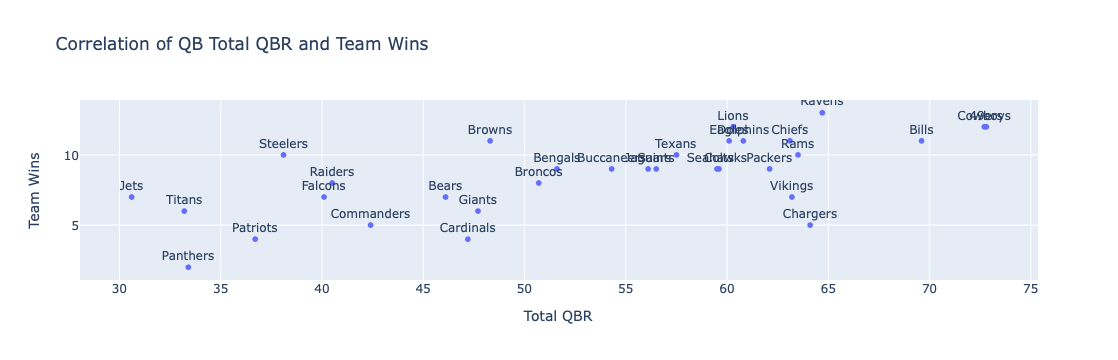

Equation of the line: Wins = 0.3522 + 0.1533 * Total_QBR
Predicted wins for QBR 51: 8.1714


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



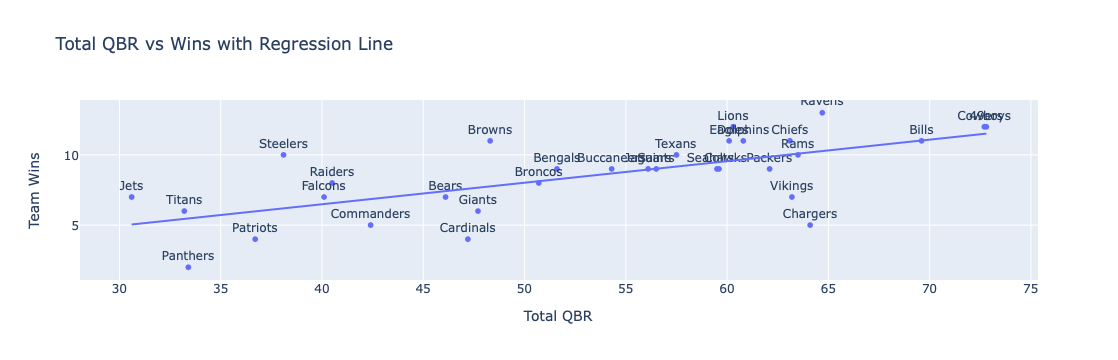

T-statistic: 4.97
P-value: 0.0000250804
The relationship between Total QBR and Wins is statistically significant.


In [37]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as stats

# Sample data for illustration purposes
data = {
    "Team": ["Steelers", "Ravens", "Bengals", "Browns", "Chiefs", "Chargers", "Cowboys", "Commanders", "Bears", "Eagles", "Giants", "Lions", "Packers", "Vikings", "Panthers", "Buccaneers", "Bills", "Patriots", "Dolphins", "Jets", "Texans", "Titans", "Jaguars", "Colts", "Raiders", "Broncos", "Saints", "Falcons", "49ers", "Rams", "Seahawks", "Cardinals"],
    "Starting_QB": ["KPickett", "LJackson", "JBurrow", "JFlacco", "PMaholmes", "JHerbert", "DPrescott", "SHowell", "JFields", "JHurts", "TTaylor", "JGoff", "JLove", "KCousins", "BYoung", "BMayfield", "JAllen", "MJones", "Tua", "ZWilson", "CStroud", "WLevine", "TLawrence", "GMinshew", "AOConnell", "RWilson", "DCarr", "DRidder", "BPurdy", "MStafford", "GSmith", "KMurray"],
    "Total_QBR": [38.1, 64.7, 51.6, 48.3, 63.1, 64.1, 72.7, 42.4, 46.1, 60.1, 47.7, 60.3, 62.1, 63.2, 33.4, 54.3, 69.6, 36.7, 60.8, 30.6, 57.5, 33.2, 56.1, 59.6, 40.5, 50.7, 56.5, 40.1, 72.8, 63.5, 59.5, 47.2],
    "Wins": [10, 13, 9, 11, 11, 5, 12, 5, 7, 11, 6, 12, 9, 7, 2, 9, 11, 4, 11, 7, 10, 6, 9, 9, 8, 8, 9, 7, 12, 10, 9, 4]
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by Total_QBR
df = df.sort_values(by="Total_QBR")

# Calculate correlation
correlation = df['Total_QBR'].corr(df['Wins'])
print(f"Correlation between Total QBR and Wins: {correlation}")

# Plot
fig = px.scatter(
    df,
    x="Total_QBR",
    y="Wins",
    text="Team",
    title="Correlation of QB Total QBR and Team Wins",
    labels={"Total_QBR": "Total QBR", "Wins": "Team Wins"},
    hover_data={"Starting_QB": True}
)

fig.update_traces(textposition='top center')
fig.show()

# Prepare the data for linear regression
X = df[['Total_QBR']]  # Independent variable (2D array for sklearn)
y = df['Wins']         # Dependent variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the model parameters
intercept = model.intercept_
slope = model.coef_[0]

print(f"Equation of the line: Wins = {intercept:.4f} + {slope:.4f} * Total_QBR")

# Example of predicting wins for a specific QBR value
qbr_example = 51
predicted_wins = model.predict(np.array([[qbr_example]]))
print(f"Predicted wins for QBR {qbr_example}: {predicted_wins[0]:.4f}")

# Optional: Plot the regression line
df['Predicted_Wins'] = model.predict(X)

fig_regression = px.scatter(
    df,
    x="Total_QBR",
    y="Wins",
    text="Team",
    title="Total QBR vs Wins with Regression Line",
    labels={"Total_QBR": "Total QBR", "Wins": "Team Wins"},
    hover_data={"Starting_QB": True}
)

fig_regression.add_traces(px.line(df, x="Total_QBR", y="Predicted_Wins").data)
fig_regression.update_traces(textposition='top center')
fig_regression.show()

# Calculate standard error of the slope
n = len(df)
se_slope = np.sqrt(np.sum((y - model.predict(X)) ** 2) / (n - 2)) / np.sqrt(np.sum((df['Total_QBR'] - np.mean(df['Total_QBR'])) ** 2))

# Calculate t-statistic for the slope
t_stat = slope / se_slope

# Calculate p-value for the t-statistic
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.10f}")


# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("The relationship between Total QBR and Wins is statistically significant.")
else:
    print("The relationship between Total QBR and Wins is not statistically significant.")
